## Markov Chain Model of a Three-Tank Battle

In [1]:
import pandas as pd
import itertools

# Tank hit probabilities
prob_A = 1 / 3
prob_B = 1 / 4
prob_C = 1 / 5

# State space: States are combinations of alive tanks
states = ['ABC', 'AB', 'AC', 'BC', 'A', 'B', 'C', 'empty']

# Initialize a dictionary to store transition probabilities
transition_matrix = {state: {s: 0 for s in states} for state in states}

# Function to calculate transition probabilities for state ABC
def transition_from_ABC():
    # Probability of each possible outcome from state ABC
    prob_ABC_to_AB = (1 / 2) * prob_A * (1 / 2) * (1 - prob_B) * (1 / 2) * (1 - prob_C)  # A and B survive, C dies
    prob_ABC_to_AC = (1 / 2) * prob_B * (1 - prob_A) * (1 / 2) * (1 - prob_C)  # A and C survive, B dies
    prob_ABC_to_BC = (1 / 2) * (1 - prob_A) * (1 / 2) * (1 - prob_B) * (1 / 2) * (1 - prob_C)  # B and C survive, A dies
    prob_ABC_to_A = (1 / 2) * prob_A * (1 - prob_B) * (1 / 2) * (1 - prob_C)  # Only A survives
    prob_ABC_to_B = (1 / 2) * (1 - prob_A) * (1 / 2) * (1 - prob_C)  # Only B survives
    prob_ABC_to_C = (1 / 2) * (1 - prob_A) * (1 - prob_B) * (1 / 2) * (1 - prob_C)  # Only C survives
    prob_ABC_to_empty = (1 / 2) * (1 - prob_A) * (1 - prob_B) * (1 - prob_C)  # No one survives

    # Set probabilities in the matrix
    transition_matrix['ABC']['AB'] = prob_ABC_to_AB
    transition_matrix['ABC']['AC'] = prob_ABC_to_AC
    transition_matrix['ABC']['BC'] = prob_ABC_to_BC
    transition_matrix['ABC']['A'] = prob_ABC_to_A
    transition_matrix['ABC']['B'] = prob_ABC_to_B
    transition_matrix['ABC']['C'] = prob_ABC_to_C
    transition_matrix['ABC']['empty'] = prob_ABC_to_empty

# Function to calculate transition probabilities for state AB
def transition_from_AB():
    prob_AB_to_A = prob_A * (1 - prob_B)  # A survives
    prob_AB_to_B = (1 - prob_A) * prob_B  # B survives
    prob_AB_to_empty = (1 - prob_A) * (1 - prob_B)  # No one survives

    transition_matrix['AB']['A'] = prob_AB_to_A
    transition_matrix['AB']['B'] = prob_AB_to_B
    transition_matrix['AB']['empty'] = prob_AB_to_empty

# Function to calculate transition probabilities for state AC
def transition_from_AC():
    prob_AC_to_A = prob_A * (1 - prob_C)  # A survives
    prob_AC_to_C = (1 - prob_A) * prob_C  # C survives
    prob_AC_to_empty = (1 - prob_A) * (1 - prob_C)  # No one survives

    transition_matrix['AC']['A'] = prob_AC_to_A
    transition_matrix['AC']['C'] = prob_AC_to_C
    transition_matrix['AC']['empty'] = prob_AC_to_empty

# Function to calculate transition probabilities for state BC
def transition_from_BC():
    prob_BC_to_B = prob_B * (1 - prob_C)  # B survives
    prob_BC_to_C = (1 - prob_B) * prob_C  # C survives
    prob_BC_to_empty = (1 - prob_B) * (1 - prob_C)  # No one survives

    transition_matrix['BC']['B'] = prob_BC_to_B
    transition_matrix['BC']['C'] = prob_BC_to_C
    transition_matrix['BC']['empty'] = prob_BC_to_empty

# Function to set transitions for states A, B, C (absorbing states)
def set_absorbing_states():
    transition_matrix['A']['A'] = 1
    transition_matrix['B']['B'] = 1
    transition_matrix['C']['C'] = 1
    transition_matrix['empty']['empty'] = 1

# Run all transition calculations
transition_from_ABC()
transition_from_AB()
transition_from_AC()
transition_from_BC()
set_absorbing_states()

# Convert transition matrix into a pandas DataFrame for better presentation
df_transition = pd.DataFrame(transition_matrix)

# Print out the transition matrix
print("Transition Matrix:")
print(df_transition)

Transition Matrix:
            ABC        AB        AC    BC  A  B  C  empty
ABC    0.000000  0.000000  0.000000  0.00  0  0  0      0
AB     0.025000  0.000000  0.000000  0.00  0  0  0      0
AC     0.033333  0.000000  0.000000  0.00  0  0  0      0
BC     0.050000  0.000000  0.000000  0.00  0  0  0      0
A      0.050000  0.250000  0.266667  0.00  1  0  0      0
B      0.133333  0.166667  0.000000  0.20  0  1  0      0
C      0.100000  0.000000  0.133333  0.15  0  0  1      0
empty  0.200000  0.500000  0.533333  0.60  0  0  0      1


## Graph Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_2292\849919572.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


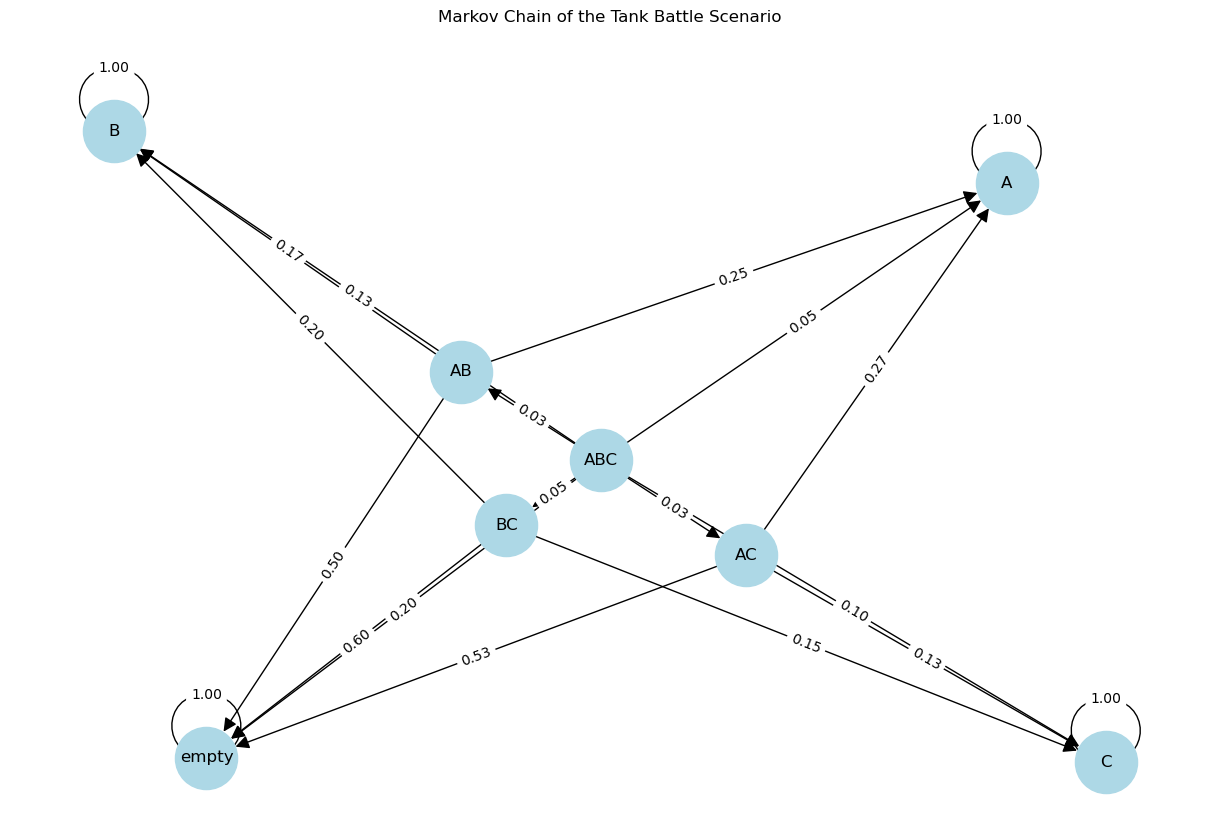

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(states)

# Add edges with labels (only if transition probability > 0)
for from_state in states:
    for to_state in states:
        prob = transition_matrix[from_state][to_state]
        if prob > 0:
            G.add_edge(from_state, to_state, label=f'{prob:.2f}')

# Get positions for the nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, arrowsize=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Markov Chain of the Tank Battle Scenario")
plt.axis('off')
plt.tight_layout()
plt.show()